## Jagan's Notebook for Module 1 Project

* Student name:  **Jagandeep Singh**
* Student pace:  full-time
* Scheduled project review date/time:  07/10/2020
* Instructor name:  Fangfang Lee

In [1]:
#Importing packages and eryk's file with cleaned data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import seaborn as sns
%matplotlib inline
import pickle


In [2]:
#loading the data files into pandas dataframe
gross = pd.read_csv('data/bom.movie_gross.csv')
imdb_name = pd.read_csv('data/imdb.name.basics.csv')
imdb_title_akas = pd.read_csv('data/imdb.title.akas.csv')
imdb_title_basics = pd.read_csv('data/imdb.title.basics.csv')
imdb_title_crew = pd.read_csv('data/imdb.title.crew.csv')
imdb_title_principals = pd.read_csv('data/imdb.title.principals.csv')
imdb_title_ratings = pd.read_csv('data/imdb.title.ratings.csv')
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter = '\t')
rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter = '\t', encoding = 'unicode_escape')
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv') #No Missing values


## Merging the data with gross to get the studios column

In [3]:
# getting Dataframe from pickle file
movie_df = pickle.load(open('movie-df_2020-07-09a.p','rb'))

In [4]:
#Merging gross and tn_movie_budgets to get profit and studios in same table
merged = pd.merge(movie_df, gross[['title', 'studio']], left_on = 'movie_title', right_on = 'title', how='left')
merged.drop(columns=['title'], inplace = True)


## Getting the names of the crew from identifier
### get_names function takes a list of name identifiers and return a list of names.

In [5]:
#Getting director names from imdb name and putting them in the columns
# This function looks through the imdb_name dataset and find the corresponding primary name for identifiers
def get_names(lis):
    li = []
    if not isinstance(lis, float):
        for item in lis:
            li.append(list(imdb_name.loc[imdb_name.nconst == item[0] ,'primary_name'])[0])
    return li
    
merged['directors'] = merged['directors'].apply(get_names)
merged['actors'] = merged['actors'].apply(get_names)
merged['actresses'] = merged['actresses'].apply(get_names)
merged['producers'] = merged['producers'].apply(get_names)


In [6]:
#Correcting the data for Avatar and Titanic movies
merged.at[2102,'directors'] = ['James Cameron']
merged.at[2102,'actresses'] = ['Zoe Saldana']
merged.at[2102,'actors'] = ['Sam Worthington']
merged.at[2102,'producers'] = ['James Cameron','Jon Landau']
merged.at[2102,'genres'] = ['Action', 'Adventure', 'Sci-Fi']

merged.at[657, 'directors'] = ['James Cameron']
merged.at[657, 'actresses'] = ['Kate Winslet']
merged.at[657, 'actors'] = ['Leonardo DiCaprio']
merged.at[657, 'producers'] = ['James Cameron', 'Jon Landau']

# DATA ANALYSIS

## Creating a column for binned ratings

In [7]:
#Binning rating and creating another column
bins = [2, 4, 6, 8, 10]
merged['binned_rating'] = pd.cut(merged['ratings'], bins)


## Top and Bottom 100 movies by Profit

In [8]:
# Top 100 and bottom 100 profitable movies
top_100 = merged.sort_values(by = 'profit', ascending = False).head(100)
bottom_100 = merged.sort_values(by = 'profit').head(100)


## Top and Bottom 20 movies by Profit

In [9]:
top_20 = merged.sort_values(by = 'profit', ascending = False).head(20)
bottom_20 = merged.sort_values(by = 'profit').head(20)


### Genres of Top 100 Profitable movies

In [10]:
# Genres of Top 100 Profitable movies
top_100_genres = list(top_100.genres)
cleanedList = [x for x in top_100.genres if ((str(x) != 'nan') & (str(x) != ''))]
flat_list = [item for sublist in cleanedList for item in sublist]
top_genre = list(set(flat_list))
top_genre.remove("")



### Genres of Bottom 100 Profitable movies

In [11]:
# Genres of Bottom 100 Profitable movies
bottom_100_genres = list(bottom_100.genres)
cleanedList = [x for x in bottom_100.genres if str(x) != 'nan']
flat_list = [item for sublist in cleanedList for item in sublist]
bottom_genre = list(set(flat_list))
bottom_genre.remove("")


## Directors of top 20 profitable movies

In [12]:
# Directors of top_20 Profitable movies
top_20_directors = list(top_20.directors)
flat_list = [item for sublist in top_20_directors for item in sublist]
top_directors = set(flat_list)
list(top_directors)[0:10]


['J.A. Bayona',
 'Ravi Punj',
 'Kyle Balda',
 'Shane Black',
 'Michael Bay',
 'Chi-kin Kwok',
 'Adam Green',
 'Sébastien Lifshitz',
 'Joss Whedon',
 'James Wan']

## Main Actors of top 20 profitable movies

In [13]:
# Actors of top_20 Profitable movies
top_100_actors = list(top_20.actors)
flat_list = [item for sublist in top_100_actors for item in sublist]
top_actors = set(flat_list)
list(top_actors)[0:10]


['Dan Stevens',
 'Aarif Rahman',
 'Vin Diesel',
 'Vincent Cassel',
 'Shawn Ashmore',
 'Caye Duran',
 'Hu RuiJie',
 'Jonathan Groff',
 'Ben Carruthers',
 'Seth Rogen']

## Main Actresses of top 20 profitable movies

In [14]:
# Actresses of top_20 Profitable movies
top_100_actresses = list(top_20.actresses)
flat_list = [item for sublist in top_100_actresses for item in sublist]
top_actresses = set(flat_list)
list(top_actresses)[0:10]

['Sandra Bullock',
 'Emma Bell',
 'Scarlett Johansson',
 'Kristen Bell',
 'Mizuki Sashide',
 'Léa Seydoux',
 'Holly Hunter',
 'Gwyneth Paltrow',
 'Eliza Jones',
 'Emma Watson']

In [15]:
#Average profit of movies grouped by release month
merged.sort_values(by = 'profit', ascending = False).head(50).groupby('release_month')['profit'].mean()


release_month
2      871.093283
3      886.064857
4     1127.583159
5     1039.047428
6      967.412407
7      802.246432
8     2996.545149
10     668.020834
11     854.363329
12    1347.187447
Name: profit, dtype: float64

In [16]:
merged.sort_values(by = 'profit', ascending = False).groupby('binned_rating')['profit'].median()


binned_rating
(2, 4]     -0.477477
(4, 6]      0.585235
(6, 8]     19.997110
(8, 10]    66.239794
Name: profit, dtype: float64

In [17]:
# Studios and profit
merged.groupby('studio')['profit'].mean().sort_values(ascending=False).head(20)


studio
P/DW        382.562574
BV          323.381017
GrtIndia    216.619584
Uni.        171.689486
Sony        170.567241
Fox         168.426108
WB (NL)     167.851702
WB          137.982872
Par.        130.987781
Strand      122.189974
MGM          89.667120
UTV          89.639907
Sum.         88.963116
MBox         82.245858
LGF          82.168469
SGem         66.351100
LG/S         63.894280
TriS         63.044975
W/Dim.       59.246133
Wein.        48.995542
Name: profit, dtype: float64

In [18]:
#This function counts the number of movies that have a particular genre.
def percentage_of_genre(df,genre):
    count = 0
    for item in df.genres:
        if not isinstance(item, float):
            if genre in item:
                count += 1
    return count

print("Percentage of Action Movies in top_100 " + str(percentage_of_genre(top_100, 'Action')) +"%" )
print("Percentage of Adventure Movies in top_100 " + str(percentage_of_genre(top_100, 'Adventure')) +"%" )


Percentage of Action Movies in top_100 51%
Percentage of Adventure Movies in top_100 69%


# Percentage of genres in Top 100 Profitable Movies


In [19]:
#percentage of genre in top movies
top = {}
for item in top_genre:
    print(item + " Movies " + str(percentage_of_genre(top_100, item)) +"%" )
    #genre_df['top'] = genre_df['top'].apply()
    top[item] = percentage_of_genre(top_100, item)
    

    

Crime Movies 4%
Thriller Movies 13%
Romance Movies 4%
Music Movies 1%
Mystery Movies 1%
Comedy Movies 26%
Family Movies 12%
Sci-Fi Movies 30%
Animation Movies 22%
Sport Movies 2%
Biography Movies 3%
Horror Movies 2%
Fantasy Movies 20%
Musical Movies 2%
Drama Movies 21%
War Movies 1%
Action Movies 51%
Adventure Movies 69%
Documentary Movies 6%


# Percentage of genres in Bottom 100 Profitable Movies


In [20]:
#percentage of genre in Bottom movies
bottom = {}
for item in bottom_genre:
    print(item + " Movies " + str(percentage_of_genre(bottom_100, item)) +"%" )
    bottom[item] = percentage_of_genre(bottom_100, item)
    

Crime Movies 21%
Thriller Movies 19%
History Movies 6%
Romance Movies 11%
Music Movies 3%
Mystery Movies 7%
Comedy Movies 30%
Family Movies 9%
Sci-Fi Movies 8%
Animation Movies 9%
Sport Movies 4%
Biography Movies 12%
Horror Movies 7%
Fantasy Movies 8%
Musical Movies 1%
Drama Movies 51%
War Movies 2%
Action Movies 40%
Adventure Movies 25%
Documentary Movies 14%
Western Movies 3%


In [21]:
# Creating a data frame for top and bottom genre percentage for plot
genre_df = pd.DataFrame({'top':pd.Series(top),'bottom':pd.Series(bottom)})
genre_df.head()

,top,bottom
Action,51.0,40
Adventure,69.0,25
Animation,22.0,9
Biography,3.0,12
Comedy,26.0,30


## BarPlot for Percentage of Genres in Top and Bottom 100 Movies

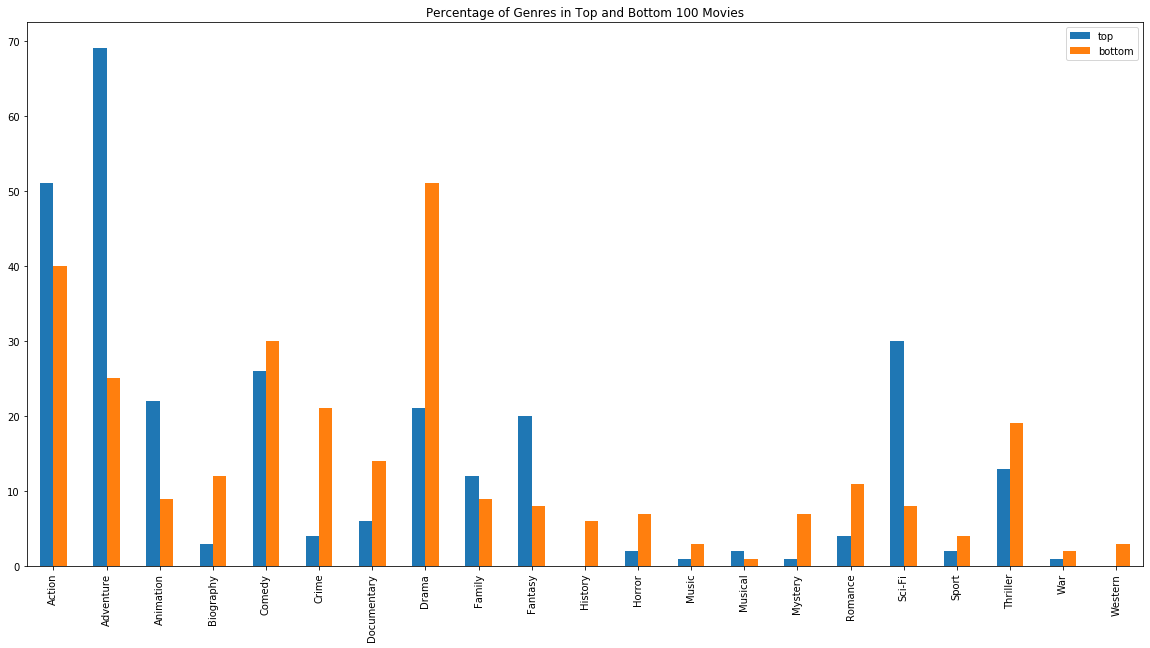

In [22]:
ax = genre_df.plot(kind='bar', title ="Percentage of Genres in Top and Bottom 100 Movies", figsize=(20, 10), legend=True)
plt.show()


In [23]:
#Production budget and 
#sns.lmplot(x='production_budget',y='profit',data = top_100,fit_reg=True) 


## Production Budget and Profit

<Figure size 1080x576 with 0 Axes>

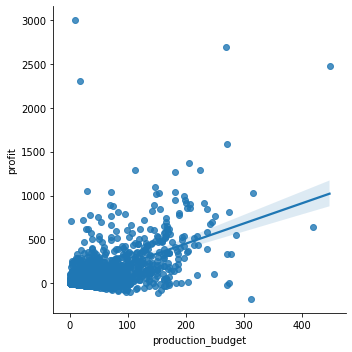

In [24]:
plt.figure(figsize=(15,8))
sns.lmplot(x='production_budget', y='profit', data = merged, fit_reg=True)



## Rating and Profit graph

Text(0.5, 1.0, 'Ratings by Profit')

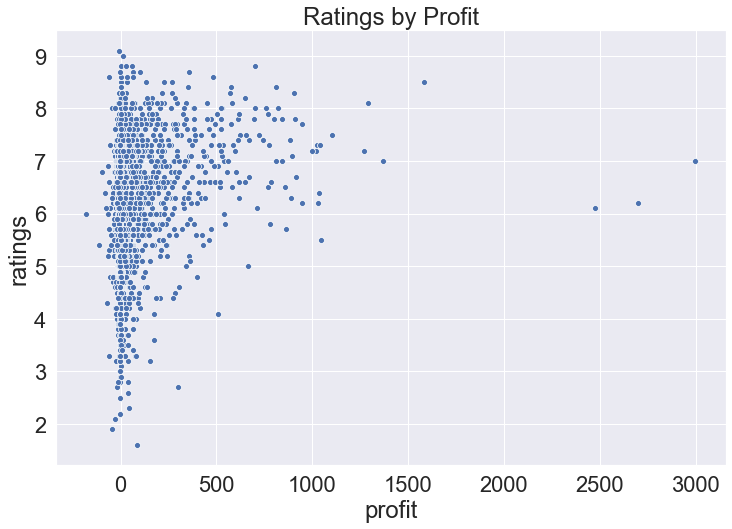

In [25]:
#rating and profit graph
plt.figure(figsize=(12,8))
sns.set(font_scale = 2)
ax = sns.scatterplot('profit', 'ratings', data=merged[['ratings', 'profit']])
ax.set_title("Ratings by Profit")


## Plot of Release month and profit

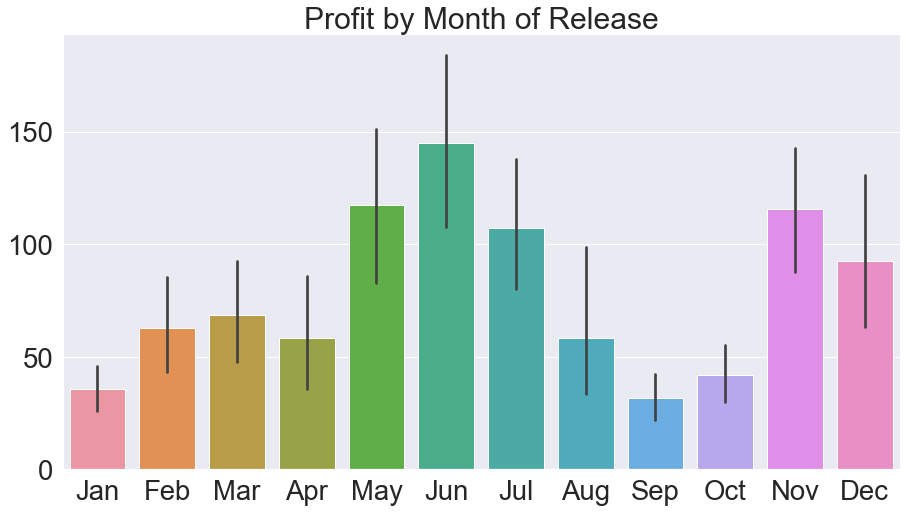

In [26]:
#sns.scatterplot('release_month','profit', data=merged[['release_month', 'profit']] )
sns.set(font_scale = 2.5)
plt.figure(figsize=(15,8))
ax = sns.barplot(merged['release_month'], merged['profit'])
ax.set_title("Profit by Month of Release")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);


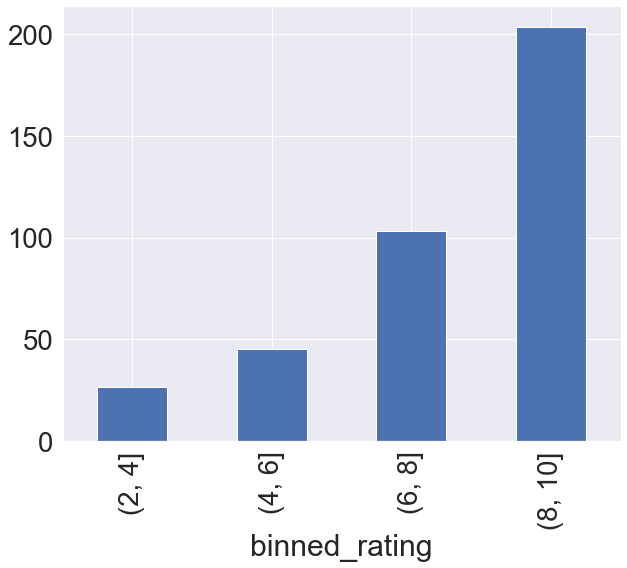

In [46]:
#Average profit of movies grouped by rating
plt.figure(figsize=(10,8))
merged.sort_values(by = 'profit', ascending = False).groupby('binned_rating')['profit'].mean().plot(kind='bar');

## Histogram of Rate of Return

In [38]:
merged['rate_return'] = merged['ln_worldwide'] - merged['ln_budget']
merged[merged.rate_return == float("-inf")]  = None

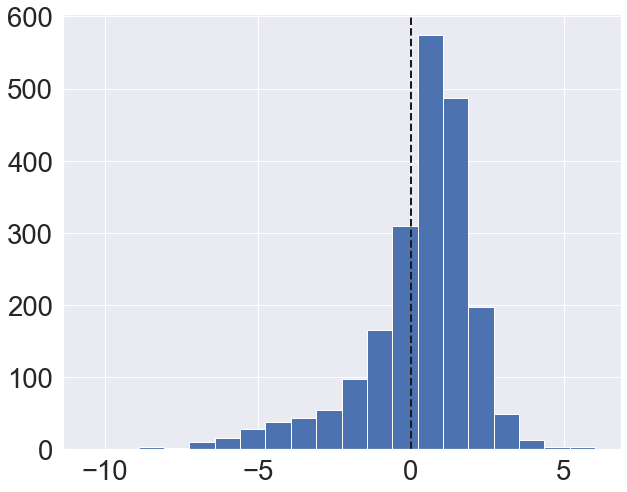

In [43]:
merged['rate_return'].hist(bins = 20, figsize = (10,8))
plt.axvline(x = 0, color='k', linestyle='dashed', linewidth=2)